In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [55]:
#Import data

#Dataset #1
games_details = pd.read_csv ("./data/games_details.csv")
games = pd.read_csv ("./data/games.csv")
players = pd.read_csv ("./data/players.csv")
ranking = pd.read_csv ("./data/ranking.csv")
teams = pd.read_csv ("./data/teams.csv")

#Dataset #2
players_data = pd.read_csv ("./data/all_seasons.csv")

#Dataset #3
draft_data = pd.read_csv ("./data/NBA_Draft_1980_2017.tsv", sep = '\t')

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2228\3805560387.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv ("./data/games_details.csv")


In [56]:
players_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [72]:
players_data = players_data[['draft_round', 'player_height', 'player_weight', 'pts', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
players_data = players_data.drop(players_data[players_data.draft_round == 'Undrafted'].index)#Remove undrafted
players_data['draft_round'] = pd.to_numeric(players_data['draft_round'])

draft_round        int64
player_height    float64
player_weight    float64
pts              float64
ast              float64
oreb_pct         float64
dreb_pct         float64
usg_pct          float64
ts_pct           float64
ast_pct          float64
dtype: object

<AxesSubplot: >

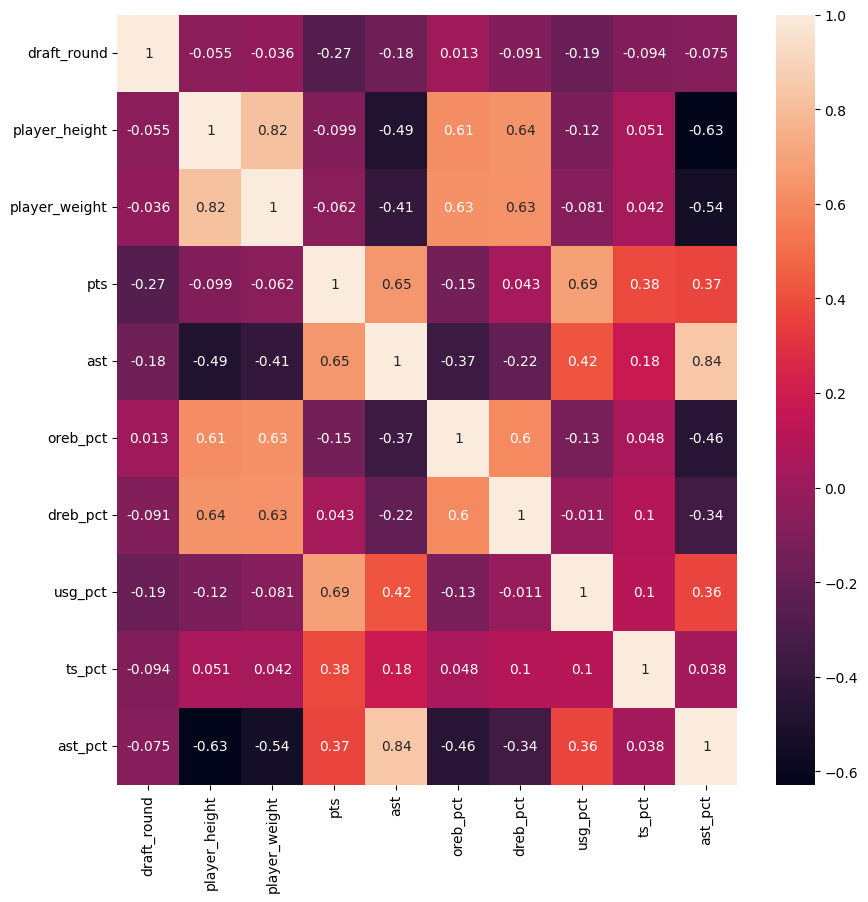

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(players_data.corr(), annot=True)

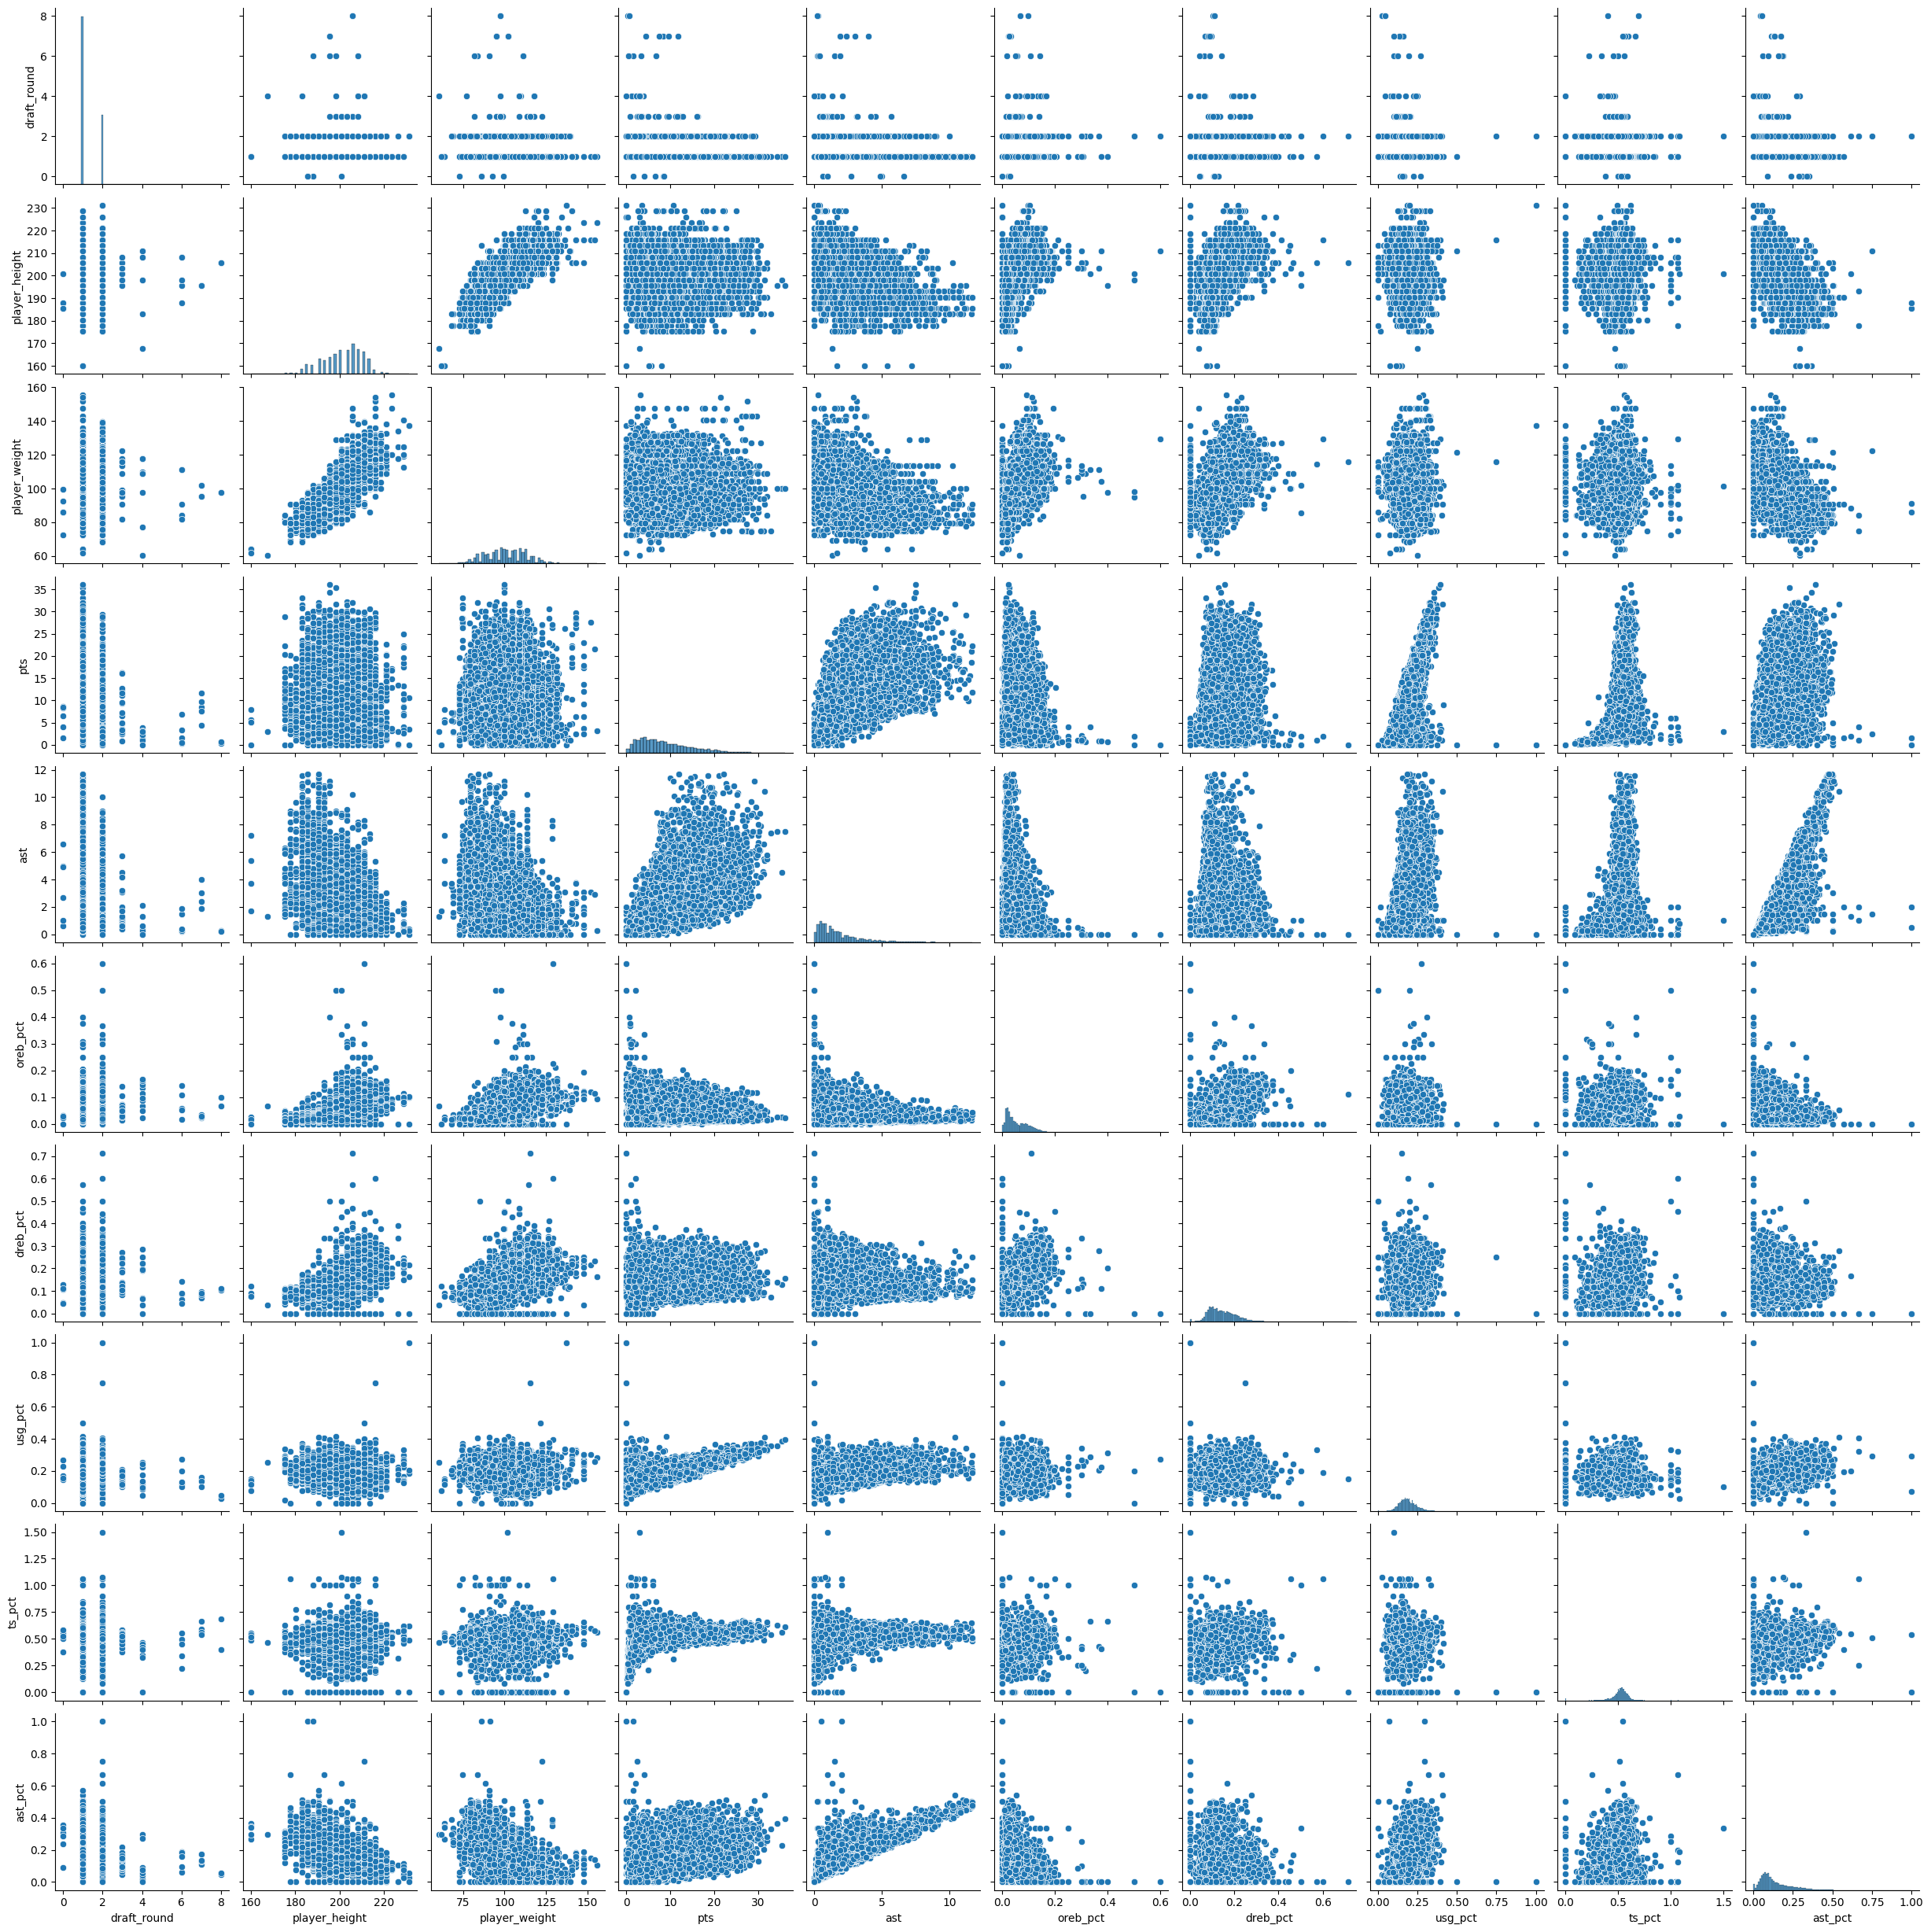

In [74]:
sns.pairplot(players_data)

In [35]:
#Using dataset #1
home = games.iloc[:,7:13]
away = games.iloc[:,14:20]
home['home'] = 1
away['home'] = 0
home = home.rename(columns={'PTS_home': 'PTS', 'FG_PCT_home': 'FG_PCT', 'FT_PCT_home': 'FT_PCT', 'FG3_PCT_home': 'FG3_PCT', 'AST_home': 'AST', 'REB_home': 'REB'})
away = away.rename(columns={'PTS_away': 'PTS', 'FG_PCT_away': 'FG_PCT', 'FT_PCT_away': 'FT_PCT', 'FG3_PCT_away': 'FG3_PCT', 'AST_away': 'AST', 'REB_away': 'REB'})
result = home.append(away, ignore_index=True)

#Normalize
scaler = MinMaxScaler()
result['PTS'] = scaler.fit_transform(result[['PTS']])
result['AST'] = scaler.fit_transform(result[['AST']])
result['REB'] = scaler.fit_transform(result[['REB']])

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2228\4230000038.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = home.append(away, ignore_index=True)


,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,home
0,126.0,0.484,0.926,0.382,25.0,46.0,1
1,120.0,0.488,0.952,0.457,16.0,40.0,1
2,114.0,0.482,0.786,0.313,22.0,37.0,1
3,113.0,0.441,0.909,0.297,27.0,49.0,1
4,108.0,0.429,1.000,0.378,22.0,47.0,1
...,...,...,...,...,...,...,...
53297,87.0,0.366,0.643,0.375,17.0,43.0,0
53298,85.0,0.411,0.636,0.267,17.0,47.0,0
53299,95.0,0.387,0.659,0.500,19.0,43.0,0
53300,94.0,0.469,0.725,0.385,18.0,45.0,0


<AxesSubplot: >

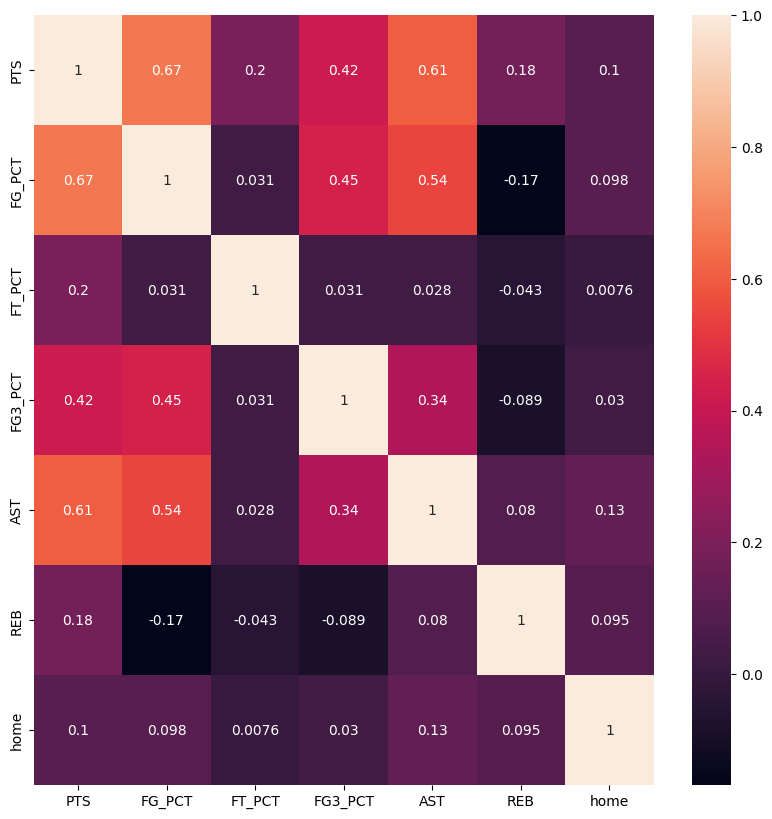

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result.corr(), annot=True)

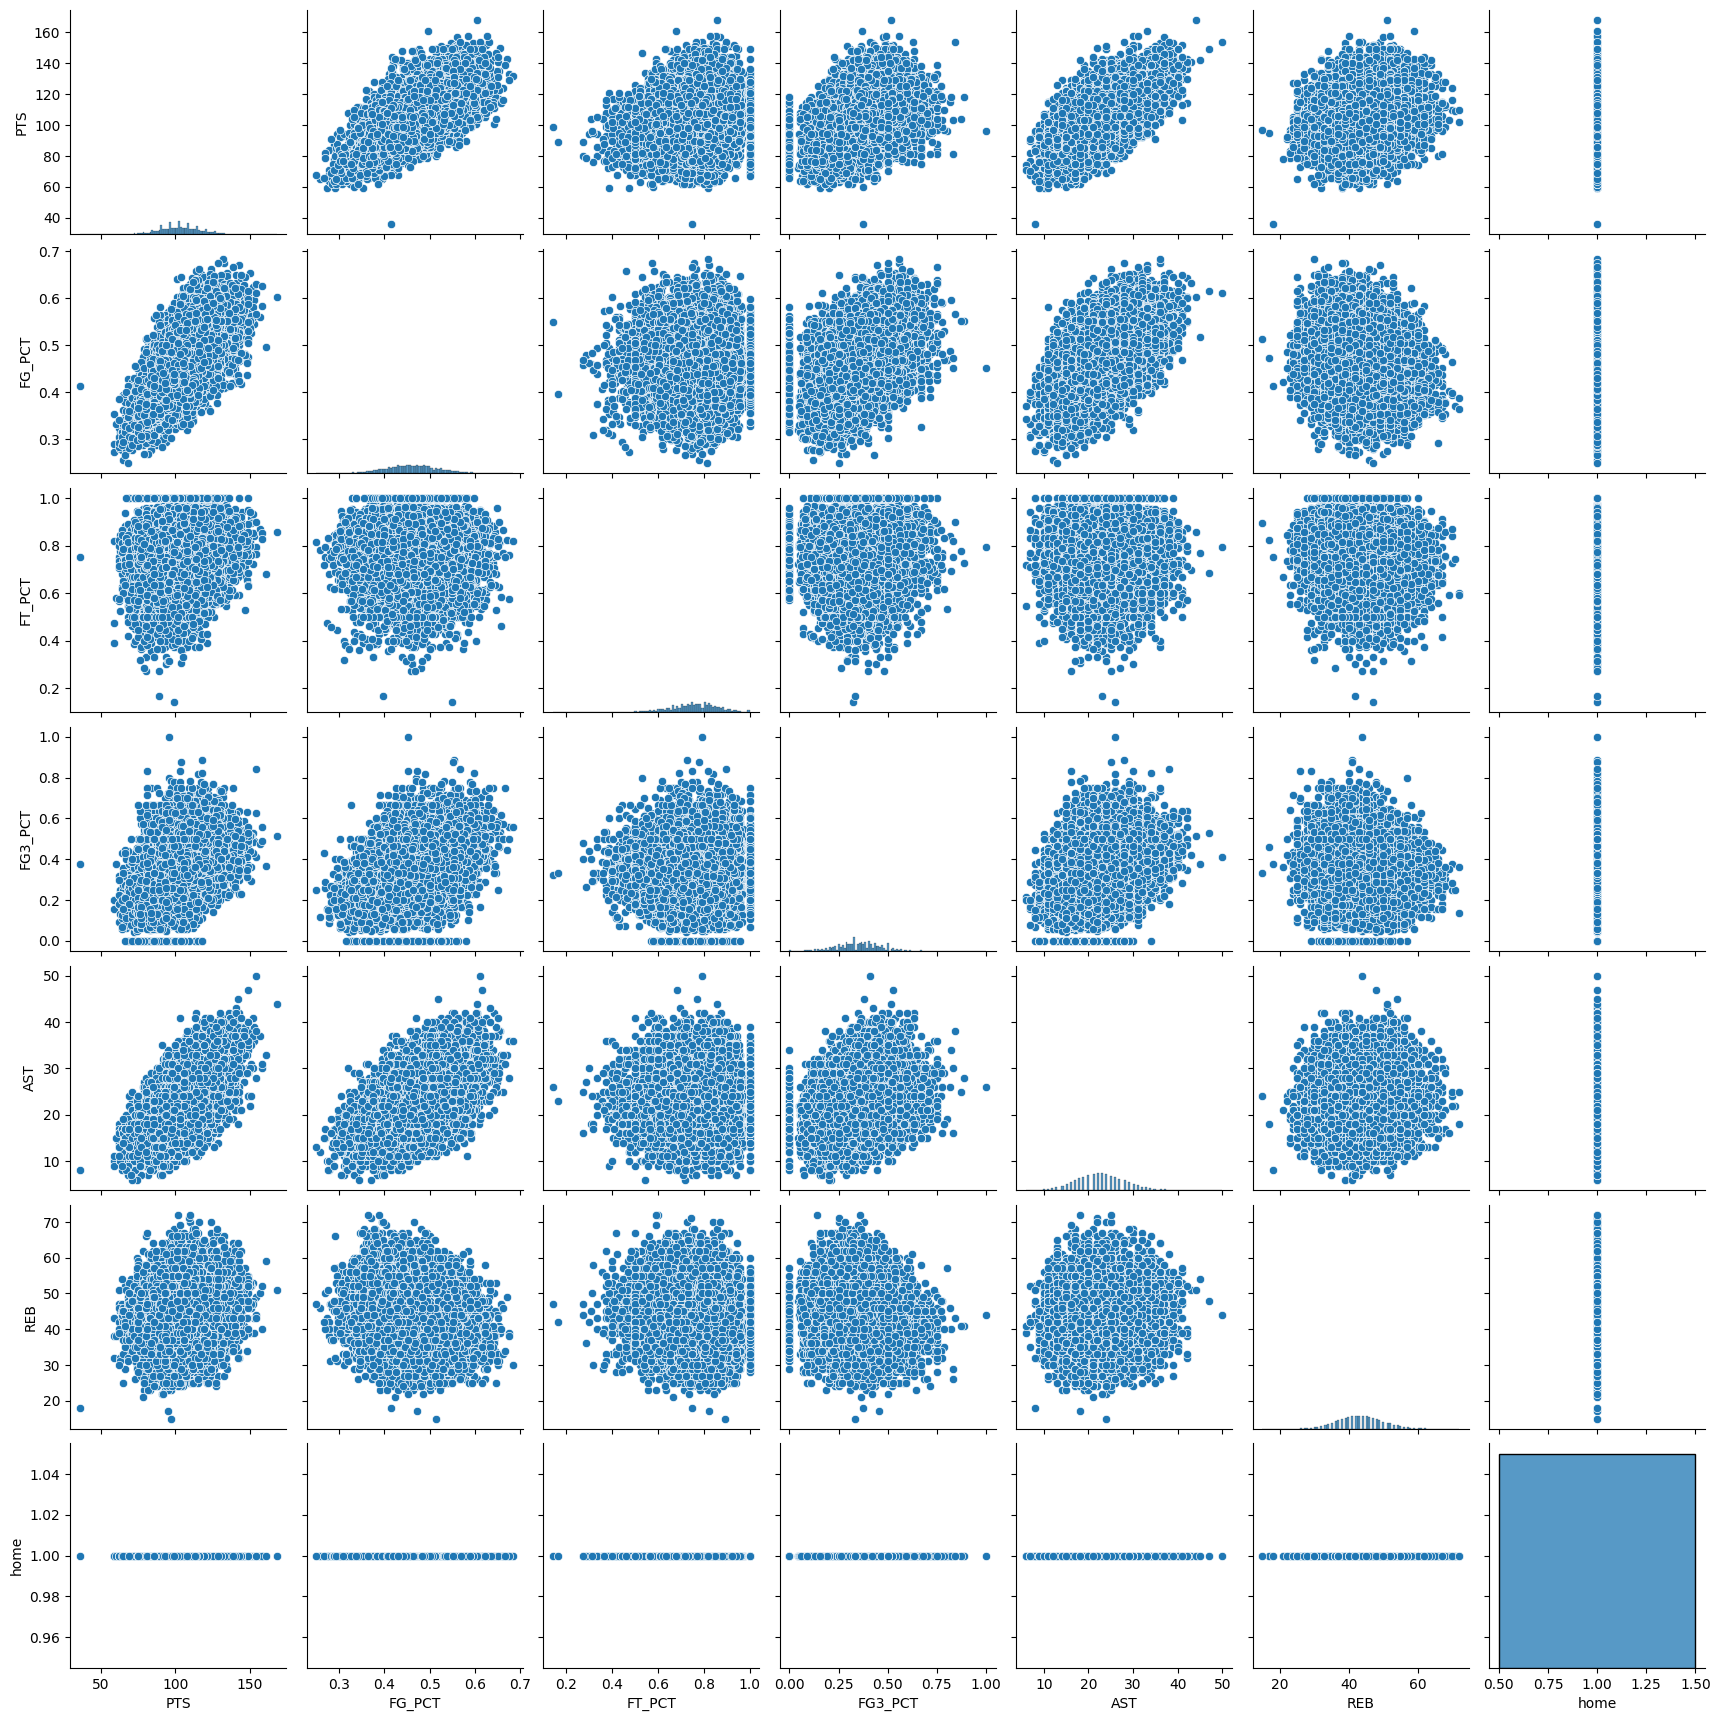

In [39]:
sns.pairplot(home)